In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import os
import random
from glob import glob
from PIL import Image

import tensorflow as tf
import tensorflow.keras.layers as tfl
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.layers.experimental.preprocessing import RandomFlip, RandomRotation
#import autokeras as ak

from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [4]:
metadata_df = pd.read_csv('Data/HAM10000_metadata.csv')

In [94]:
#Previewing metasata for images in dataset  dx is the type of cancer 
metadata_df.head(3)

,lesion_id,image_id,dx,dx_type,age,sex,localization,dataset
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,vidir_modern
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,vidir_modern
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,vidir_modern


In [7]:
print(metadata_df['dx'].unique())
print(metadata_df['dx'].value_counts())
# as it seems there some types has much propabability to happen than others

['bkl' 'nv' 'df' 'mel' 'vasc' 'bcc' 'akiec']
nv       6705
mel      1113
bkl      1099
bcc       514
akiec     327
vasc      142
df        115
Name: dx, dtype: int64


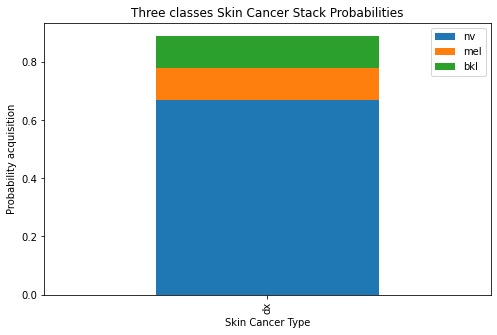

In [27]:
Scores = metadata_df['dx'].value_counts(normalize= True)[0:3]
data=pd.DataFrame([Scores])
#data.index=['Skin Cancer Type']
data.plot(kind='bar',stacked=True,figsize=(8,5))
plt.ylabel('Probability acquisition')
plt.title('Three classes Skin Cancer Stack Probabilities')
plt.xlabel('Skin Cancer Type')
plt.show()

<AxesSubplot:>

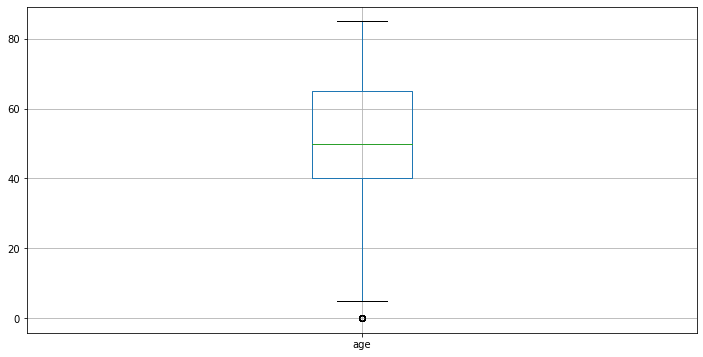

In [56]:
metadata_df.boxplot(column=['age'], figsize= (12,6))  

In [96]:
lblen = LabelEncoder()
lblen.fit(metadata_df['dx'])
print(list(lblen.classes_))

metadata_df['label'] = lblen.transform(metadata_df["dx"]) 

['akiec', 'bcc', 'bkl', 'df', 'mel', 'nv', 'vasc']


In [97]:
# Show sample of the data with label
metadata_df.sample(5)

,lesion_id,image_id,dx,dx_type,age,sex,localization,dataset,label
3755,HAM_0000205,ISIC_0029471,nv,follow_up,35.0,female,trunk,vidir_molemax,5
2947,HAM_0006049,ISIC_0031614,bcc,histo,45.0,female,back,rosendahl,1
399,HAM_0004945,ISIC_0029358,bkl,histo,85.0,male,back,rosendahl,2
5868,HAM_0000914,ISIC_0025995,nv,follow_up,35.0,female,trunk,vidir_molemax,5
3134,HAM_0003788,ISIC_0026246,nv,follow_up,45.0,female,lower extremity,vidir_molemax,5


In [126]:
## Balancing Data
# from sklearn.utils import resample

# df_0 =metadata_df[metadata_df['label'] == 0]
# df_1 =metadata_df[metadata_df['label'] == 1]
# df_2 =metadata_df[metadata_df['label'] == 2]
# df_3 =metadata_df[metadata_df['label'] == 3]
# df_4 =metadata_df[metadata_df['label'] == 4]
# df_5 =metadata_df[metadata_df['label'] == 5]
# df_6 =metadata_df[metadata_df['label'] == 6]

# n_samples=250 
# df_0_balanced = resample(df_0, replace=True, n_samples=n_samples, random_state=42) 
# df_1_balanced = resample(df_1, replace=True, n_samples=n_samples, random_state=42) 
# df_2_balanced = resample(df_2, replace=True, n_samples=n_samples, random_state=42)
# df_3_balanced = resample(df_3, replace=True, n_samples=n_samples, random_state=42)
# df_4_balanced = resample(df_4, replace=True, n_samples=n_samples, random_state=42)
# df_5_balanced = resample(df_5, replace=True, n_samples=n_samples, random_state=42)
# df_6_balanced = resample(df_6, replace=True, n_samples=n_samples, random_state=42)

# #Combined back to a single dataframe
# metadata_df_balanced = pd.concat([df_0_balanced, df_1_balanced, 
#                               df_2_balanced, df_3_balanced, 
#                               df_4_balanced, df_5_balanced, df_6_balanced])

# #Check the distribution. All classes should be balanced now.
# print(metadata_df_balanced['dx'].value_counts())
# print(metadata_df_balanced.duplicated().sum())

#metadata_df_balanced

In [127]:
#metadata_df_balanced.query("dx =='mel'").duplicated().sum()

In [99]:
# Reading Images associated with each class
#The glob module finds all the pathnames matching a specified pattern according
#to the rules used by the Unix shell, although results are returned in arbitrary order

SIZE = 160  #pixel*pixel

image_path = {os.path.splitext(os.path.basename(x))[0]: x for x in glob('Data/HAM10000_Dataset/**/*.jpg', recursive= True)}
#glob('Data/HAM10000_Dataset/**/*.jpg',recursive=True)  Give u all the pathes ends with .jpg

# make a new column with the path of the image associated with each class

metadata_df['path'] = metadata_df['image_id'].map(image_path.get)
#metadata_df_balanced['image'] = metadata_df_balanced['path'].map(lambda x: np.asarray(Image.open(x).resize((SIZE,SIZE))))

metadata_df.sample(5)

,lesion_id,image_id,dx,dx_type,age,sex,localization,dataset,label,path
5309,HAM_0003134,ISIC_0027001,nv,follow_up,40.0,female,trunk,vidir_molemax,5,Data/HAM10000_Dataset\ISIC_0027001.jpg
8574,HAM_0000284,ISIC_0025597,nv,histo,50.0,female,lower extremity,rosendahl,5,Data/HAM10000_Dataset\ISIC_0025597.jpg
4950,HAM_0004229,ISIC_0029593,nv,follow_up,40.0,male,trunk,vidir_molemax,5,Data/HAM10000_Dataset\ISIC_0029593.jpg
9271,HAM_0003579,ISIC_0028042,nv,consensus,60.0,male,back,vidir_modern,5,Data/HAM10000_Dataset\ISIC_0028042.jpg
5766,HAM_0002687,ISIC_0032037,nv,follow_up,60.0,female,back,vidir_molemax,5,Data/HAM10000_Dataset\ISIC_0032037.jpg


In [124]:
#make folder name for each class
import shutil
bkl_path = 'Data/HAM10000_Dataset/bkl'
nv_path = 'Data/HAM10000_Dataset/nv'
akiec_path = 'Data/HAM10000_Dataset/akiec'
bcc_path = 'Data/HAM10000_Dataset/bcc'
df_path = 'Data/HAM10000_Dataset/df'
mel_path = 'Data/HAM10000_Dataset/mel'
vasc_path = 'Data/HAM10000_Dataset/vasc'

Im_Id = metadata_df['image_id']
Dx = metadata_df['dx']

In [125]:
for index, pth in enumerate(metadata_df['path']):  # enumerate to get index in each loop
    if Dx[index] == 'bkl':
        if not os.path.isdir(bkl_path):
            os.mkdir(bkl_path)
        shutil.move(pth, bkl_path)
    elif Dx[index] == 'nv':
        if not os.path.isdir(nv_path):
            os.mkdir(nv_path)
        shutil.move(pth, nv_path)
    elif Dx[index] == 'akiec':
        if not os.path.isdir(akiec_path):
            os.mkdir(akiec_path)
        shutil.move(pth, akiec_path) 
    elif Dx[index] == 'bcc':
        if not os.path.isdir(bcc_path):
            os.mkdir(bcc_path)
        shutil.move(pth, bcc_path)
    elif Dx[index] == 'df':
        if not os.path.isdir(df_path):
            os.mkdir(df_path)
        shutil.move(pth, df_path)
    elif Dx[index] == 'mel':
        if not os.path.isdir(mel_path):
            os.mkdir(mel_path)
        shutil.move(pth, mel_path)
    elif Dx[index] == 'vasc':
        if not os.path.isdir(vasc_path):
            os.mkdir(vasc_path)
        shutil.move(pth, vasc_path)
    
    
        
    #print(os.path.split(pth)[0].replace('Dataset','bahaa'))

In [129]:
# seed must be equal for both training and validation not to overlap.
BATCH_SIZE = 32
IMG_SIZE = (160, 160)  # resolution
directory = "Data/HAM10000_Dataset/"

train_dataset = image_dataset_from_directory(directory,
                                             shuffle=True,
                                             label_mode='categorical',
                                             labels='inferred',
                                             batch_size=BATCH_SIZE,
                                             image_size=IMG_SIZE,
                                             validation_split=0.2,
                                             subset='training',
                                             color_mode='rgb',
                                             seed=42)
validation_dataset = image_dataset_from_directory(directory,
                                             shuffle=True,
                                             labels='inferred',
                                             label_mode='categorical',
                                             batch_size=BATCH_SIZE,
                                             image_size=IMG_SIZE,
                                             validation_split=0.2,
                                             subset='validation',
                                             color_mode='rgb',
                                             seed=42)

Found 10015 files belonging to 7 classes.
Using 8012 files for training.
Found 10015 files belonging to 7 classes.
Using 2003 files for validation.


In [130]:
class_names = train_dataset.class_names
class_names

['akiec', 'bcc', 'bkl', 'df', 'mel', 'nv', 'vasc']

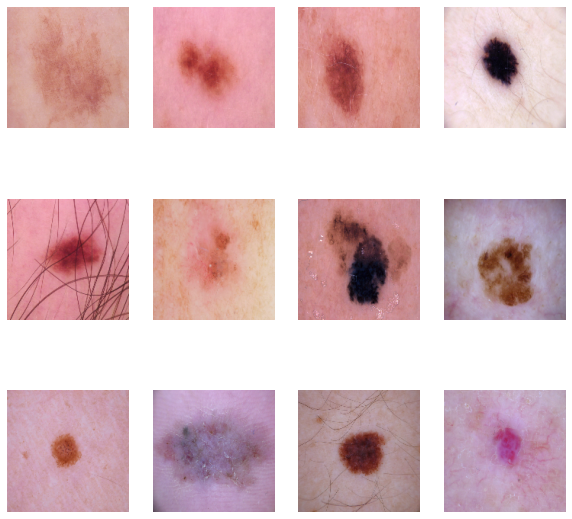

In [133]:
plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        #plt.title(class_names[labels[i]])
        plt.axis("off")

In [134]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)
# prevents a memory bottleneck that can occur when reading from disk

In [135]:
preprocess_input = tf.keras.applications.resnet_v2.preprocess_input #data preprocessing using the same weights the model was trained on

In [136]:
# MobileNet V2 trained on imagenet data
IMG_SHAPE = IMG_SIZE + (3,) # as Img size 160*160 only but we need it 160*160*3 for the model
base_model = tf.keras.applications.ResNet101V2(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')
base_model.summary()

Model: "resnet101v2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_8 (InputLayer)            [(None, 160, 160, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 166, 166, 3)  0           input_8[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 80, 80, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
pool1_pad (ZeroPadding2D)       (None, 82, 82, 64)   0           conv1_conv[0][0]                 
________________________________________________________________________________________

In [137]:
nb_layers = len(base_model.layers)
print(base_model.layers[nb_layers - 2].name)  # pre- Last name
print(base_model.layers[nb_layers - 1].name)  # Last Layer name
# Last two layers are called top layers (Classification)

post_bn
post_relu


In [138]:
# Create the breast cancer model
def BC_model(image_shape=IMG_SIZE):
    ''' Define a tf.keras model for multi-class classification out of the MobileNetV2 model
    Arguments:
        image_shape -- Image width and height
        data_augmentation -- data augmentation function
    Returns:
    Returns:
        tf.keras.model
    '''
    input_shape = image_shape + (3,)
    
    base_model = tf.keras.applications.ResNet101V2(input_shape=input_shape,
                                                   include_top=False, # <== Important!!!!
                                                   weights='imagenet') # Create the model with its weights without the top layers
     
    base_model.trainable = False  # not to train any of the base model and train only the new layers will be added
    inputs = tf.keras.Input(shape=input_shape)
    
    #x = data_augmentation(inputs) # augmenting the input
    
    x = preprocess_input(inputs) #data preprocessing using the same weights the model was trained on
    
    x = base_model(x, training=False)
    
    x = tfl.GlobalAveragePooling2D()(x)
    x = tfl.Dropout(0.25)(x)
    prediction_layer = tfl.Dense(7, activation='softmax') 
    outputs = prediction_layer(x) 
    model = tf.keras.Model(inputs, outputs)
    print(model.summary())
    return model

In [139]:
BCModel = BC_model(IMG_SIZE)

Model: "functional_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        [(None, 160, 160, 3)]     0         
_________________________________________________________________
tf_op_layer_RealDiv_3 (Tenso [(None, 160, 160, 3)]     0         
_________________________________________________________________
tf_op_layer_Sub_3 (TensorFlo [(None, 160, 160, 3)]     0         
_________________________________________________________________
resnet101v2 (Functional)     (None, 5, 5, 2048)        42626560  
_________________________________________________________________
global_average_pooling2d_3 ( (None, 2048)              0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 2048)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 7)                

In [140]:
base_learning_rate = 0.01
BCModel.compile(optimizer=tf.keras.optimizers.Adam(lr=base_learning_rate),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [141]:
initial_epochs = 5
history = BCModel.fit(train_dataset, validation_data=validation_dataset, epochs=initial_epochs, use_multiprocessing= True)

Epoch 1/5
251/251 [==============================] - 616s 2s/step - loss: 1.6753 - accuracy: 0.6671 - val_loss: 1.5964 - val_accuracy: 0.7299
Epoch 2/5
251/251 [==============================] - 613s 2s/step - loss: 1.4435 - accuracy: 0.7141 - val_loss: 1.9702 - val_accuracy: 0.7304
Epoch 3/5
251/251 [==============================] - 615s 2s/step - loss: 1.4925 - accuracy: 0.7157 - val_loss: 1.6722 - val_accuracy: 0.7164
Epoch 4/5
251/251 [==============================] - 568s 2s/step - loss: 1.4622 - accuracy: 0.7264 - val_loss: 1.7634 - val_accuracy: 0.7454
Epoch 5/5
251/251 [==============================] - 565s 2s/step - loss: 1.4086 - accuracy: 0.7319 - val_loss: 1.7569 - val_accuracy: 0.7284


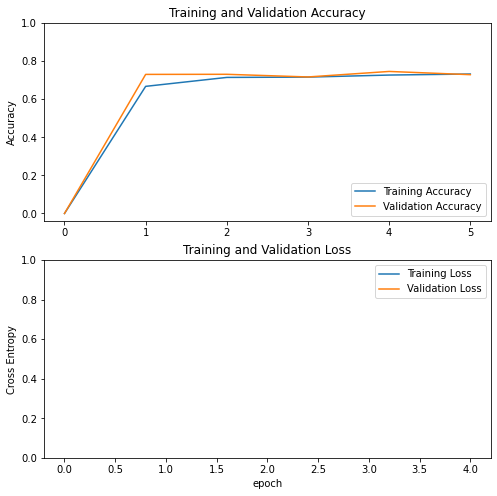

In [142]:
acc = [0.] + history.history['accuracy']
val_acc = [0.] + history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [143]:
# Make it trainable from specified layer number
base_model.trainable = True # Make all trainable as a start
print("Number of layers in the base model: ", len(base_model.layers))

Number of layers in the base model:  377


In [144]:
fine_tune_at = 350 # Number to choose

for layer in base_model.layers[:fine_tune_at]:
    #print('Layer ' + layer.name + ' frozen.')
    layer.trainable = False
    
# Define a BinaryCrossentropy loss function. Use from_logits=True
loss_function= 'categorical_crossentropy'
# Define an Adam optimizer with a learning rate of 0.1 * base_learning_rate
optimizer = tf.keras.optimizers.Adam(learning_rate=base_learning_rate*0.1)# 0.001
# Use accuracy as evaluation metric
metrics=['accuracy']

### END CODE HERE

BCModel.compile(loss=loss_function,
              optimizer = optimizer,
              metrics=metrics)

In [145]:
fine_tune_epochs = 5
total_epochs =  initial_epochs + fine_tune_epochs

history_fine = BCModel.fit(train_dataset,
                         epochs=total_epochs,
                         initial_epoch=history.epoch[-1],
                         validation_data=validation_dataset)

Epoch 5/10
251/251 [==============================] - 604s 2s/step - loss: 0.9334 - accuracy: 0.7806 - val_loss: 1.4169 - val_accuracy: 0.7494
Epoch 6/10
251/251 [==============================] - 601s 2s/step - loss: 0.7988 - accuracy: 0.7969 - val_loss: 1.2621 - val_accuracy: 0.7469
Epoch 7/10
251/251 [==============================] - 606s 2s/step - loss: 0.7373 - accuracy: 0.7988 - val_loss: 1.2505 - val_accuracy: 0.7599
Epoch 8/10
251/251 [==============================] - 603s 2s/step - loss: 0.6707 - accuracy: 0.7991 - val_loss: 1.2153 - val_accuracy: 0.7673
Epoch 9/10
251/251 [==============================] - 598s 2s/step - loss: 0.6549 - accuracy: 0.8097 - val_loss: 1.1662 - val_accuracy: 0.7569
Epoch 10/10
251/251 [==============================] - 604s 2s/step - loss: 0.6380 - accuracy: 0.8073 - val_loss: 1.1665 - val_accuracy: 0.7574


In [146]:
acc += history_fine.history['accuracy']
val_acc += history_fine.history['val_accuracy']

loss += history_fine.history['loss']
val_loss += history_fine.history['val_loss']

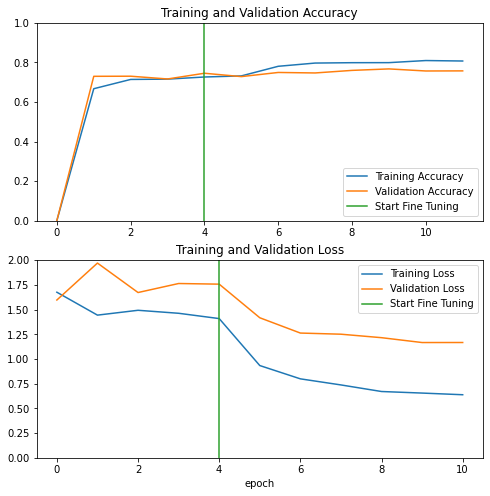

In [148]:
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.ylim([0, 1])
plt.plot([initial_epochs-1,initial_epochs-1],
          plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.ylim([0, 2.0])
plt.plot([initial_epochs-1,initial_epochs-1],
         plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
base_model.summary()

In [149]:
BCModel.evaluate(validation_dataset)

63/63 [==============================] - 120s 2s/step - loss: 1.1665 - accuracy: 0.7574


[1.1665195226669312, 0.7573639750480652]

In [150]:
BCModel.evaluate(train_dataset)

251/251 [==============================] - 474s 2s/step - loss: 0.3905 - accuracy: 0.8667


[0.3904891312122345, 0.8666999340057373]

In [262]:
folder_dir = 'Data/Test/mel/'
predicts = []
for img in os.listdir(folder_dir):
    img_width, img_height = 160, 160
    img = tf.keras.preprocessing.image.load_img(os.path.join(folder_dir,img), target_size = (img_width, img_height))
    img = tf.keras.preprocessing.image.img_to_array(img)
    img = np.expand_dims(img, axis = 0)
    array_probs = BCModel.predict(img)
    predicts.append(class_names[np.where(array_probs == np.amax(array_probs))[1][0]])


In [197]:
#for img,labels in train_dataset:
    #plt.imshow(imgs.numpy().astype("uint8"))
    #detect = list(labels[11].numpy())
    #print(class_names[detect.index(max(detect))])
 #  img = np.expand_dims(img, axis = 0)
    #print(img)
    #list_probs = list(BCModel.predict(img))
    #print(class_names[list_probs.index(max(list_probs))])

In [265]:
predicts.count('mel')

139